In [1]:
import qctoolkit as qtk
import numpy as np
from matplotlib import pyplot as plt
import os
from datetime import datetime
import ast
from subprocess import call

%matplotlib inline

/home/samio/local/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


missing file: mov2asc
please modify /path/to/qctoolkit/setting.py and recompile.


# Set up CCS and GA optimizer
__Required__ files include:
* base molecule file in the format of: molname.xyz
* Hydrogens must be at the bottom of the file
* first order derivative data: data_molname_1st.npz (in Z space)
* second order derivative data: data_molname.npz (in normal mode space)

By doing this with the correct file names, one only need to choose the base molecule xyz file to load all others

In [2]:
mol_base = qtk.Molecule('coronene.xyz')

In [3]:
mol_name = os.path.splitext(mol_base.name)[0]
ccs_input = mol_name + '.yml'
mol_data = np.load('data_' + mol_name + '.npz')
d1E_data = np.load('data_' + mol_name + '_1st.npz')
ev_data = mol_data['v']
ew_data = mol_data['w']
d1E_Z = d1E_data['arr_0']
N_heavy = int(np.ones(mol_base.N)[mol_base.Z > 1].sum())

In [4]:
log_file = 'ga_' + mol_name + '.log'
log = qtk.Logger(log_file)
ccs = qtk.CCS(mol_base, ccs_input)

#ccs.constraint = False

DB: loading existing database: ga_coronene.log 
 ===== CCS REPORT ===== 
generating molecule: coronene 
ccs parameter file: coronene.yml 
mutation indices: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]] 
target atomic numbers: [[5, 6, 7]] 
length of mutation vector: 24 <=> [24] 
ccs coordinate: ['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm'] 
 ========= END ======== 


In [5]:
ls

coronene_BN01.yml  coronene_BN12.yml        optimization_back.db
coronene_BN02.yml  coronene.xyz             optimization.db
coronene_BN03.yml  coronene.yml             opt_mol_00.svg
coronene_BN04.yml  data_coronene_1st.npz    opt_mol_01.svg
coronene_BN05.yml  data_coronene.npz        opt_mol_02.svg
coronene_BN06.yml  ga_coronene.log          opt_mol_03.svg
coronene_BN07.yml  GAOptimize_coronene/     opt_validate_6k.db
coronene_BN08.yml  GAOptimize_coronene.zip  target_mol.svg
coronene_BN09.yml  GAOptimize.ipynb         test.xyz
coronene_BN10.yml  generate_coronene_BN.sh  tmp.pdb
coronene_BN11.yml  new.db                   tmp.xyz


In [6]:
ccs_BNs = []
ccs_base_name = 'coronene_BN'
for i in range(12):
    ccs_name = "%s%02d.yml" % (ccs_base_name, i+1)
    print ccs_name
    ccs_BNs.append(qtk.CCS(mol_base, ccs_name))

coronene_BN01.yml
 ===== CCS REPORT ===== 
generating molecule: coronene 
ccs parameter file: coronene_BN01.yml 
mutation indices: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]] 
target atomic numbers: [[5, 6, 7]] 
length of mutation vector: 24 <=> [24] 
ccs coordinate: ['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm'] 
 ========= END ======== 
coronene_BN02.yml
 ===== CCS REPORT ===== 
generating molecule: coronene 
ccs parameter file: coronene_BN02.yml 
mutation indices: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]] 
target atomic numbers: [[5, 6, 7]] 
length of mutation vector: 24 <=> [24] 
ccs coordinate: ['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm'] 
 ========= END ======== 
coronene_BN03.yml
 ===== CCS REPORT ===== 
generating molecule: coronene 
ccs pa

In [7]:
ccs_t = ccs_BNs[0]
ccs_t.element_count

{5: [8]}

In [ ]:
coord = ccs_t.random()[1]
mol = ccs_t.generate(**coord)
mol.Z

## Test CCS with constraint

In [5]:
coord = ccs.random()[1]
start = datetime.now()
mol = ccs.generate(**coord)
print datetime.now() - start
print mol.Z.sum()
#mol.write('test.xyz')

0:00:00.004521
156.0


In [6]:
mol.write('test.xyz')

In [7]:
#np.sqrt(np.ones(N_heavy)[molZ != 0].sum())

In [8]:
molZ = mol.Z[:N_heavy] - mol_base.Z[:N_heavy]
molZ_es = ev_data.dot(molZ)
print np.linalg.norm(molZ_es), np.linalg.norm(molZ)

3.741657386773941 3.7416573867739413


In [9]:
mol.Z

array([7., 7., 6., 5., 7., 7., 6., 7., 5., 7., 5., 6., 6., 6., 6., 5., 5.,
       5., 6., 6., 7., 5., 6., 6., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

# system dependent functions for GA optimizer

In [35]:
def genCCSInp():
    """rapper for GA optimizer"""
    _coord = ccs.random()[1]
    return _coord

penalty_input = [ccs, {}]

def energy_estimate(dZ):
    # normal mode decomposition
    dZes = dZ.dot(ev_data)
    # calculate first/second order estimate
    d1E = dZ.dot(d1E_Z)
    d2E = (dZes ** 2).dot(ew_data) * 0.5
    return d1E + d2E

def penalty_function(ccs_coord, ccs, qmsetting_dict={}):

    target = -1.41989176
    node_name = 'test_run'
    time_stamp = datetime.now()

    mol_mut = ccs.generate(**ccs_coord)
    mol_mut.name = '%s_%s' % (node_name, time_stamp.strftime('%m%d%H%M%S%f')[:11])
    mol_mut.name = mol_mut.name + '_' + str(os.getpid())[-3:]
    
    # construct vector of dZ, lenght of 24 for coronene
    mol_mut_dZ = mol_mut.Z[:N_heavy] - mol_base.Z[:N_heavy]
    D2E = energy_estimate(mol_mut_dZ)
    
    return np.sqrt((D2E - target) ** 2), mol_mut.name

# test the energy evaluation and penalty function

In [11]:
coord_test = ccs.random()[1]
print penalty_function(coord_test, ccs)
mol_test = ccs.generate(**coord_test)
print mol_test.Z

(1.763949276578186, 'test_run_02061709380_476')
[5. 7. 5. 5. 5. 6. 6. 6. 5. 5. 5. 6. 7. 7. 6. 7. 7. 7. 6. 5. 6. 7. 6. 7.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
test_dz = np.loadtxt('../02_ANM_modePlot/data_space?/coronene-dz-02-data.txt')
test_dE = np.loadtxt('../02_ANM_modePlot/data_space/coronene-dE-02-data.txt')

In [13]:
energy_estimate(test_dz)

array([-1.41989176, -1.30210093, -1.39547041, -1.40329793, -1.46413607,
       -1.4746172 , -1.46517339, -1.48331989, -1.2848788 , -1.46002876,
       -1.4763204 , -1.4332661 , -1.4763289 , -1.48164943, -1.43326185,
       -1.48541649, -1.36686112])

In [14]:
test_dE[:,0]

array([-1.41989176, -1.3020973 , -1.39547041, -1.40330857, -1.46413607,
       -1.4746172 , -1.46517339, -1.48331989, -1.2848788 , -1.46001861,
       -1.47632465, -1.43325595, -1.47632465, -1.48165533, -1.43325595,
       -1.48541224, -1.36685687])

# GA optimizer

In [15]:
optimzer = qtk.optimization.GeneticOptimizer(
    penalty_function,
    penalty_input,
    genCCSInp,
    ccs.mate,
    20,
    log_file=log_file,
    new_run=False,
    max_step=4000,
)

DB: loading existing database: optimization.db 


In [16]:
#optimzer.run()

# analysis on test GA run

In [17]:
from decimal import Decimal
"%.2E" % Decimal(3 ** 24)

'2.82E+11'

~282 billion

In [18]:
opt_log = qtk.Logger('opt_validate_6k.db')

DB: loading existing database: optimization.db 


In [19]:
def hist_plot(ax, opt_log, extract_data=False):
    entries = [e for e in opt_log.list(has_data=True) if e.data > 0]
    entries_sorted = [e for e in opt_log.list(has_data=True, order='ascent') if e.data > 0]

    if extract_data:
        outs = []
        outs_true = []
        for i in range(len(entries)):
            out, out_true = extract(i)
            if out:
                outs.append(out) 
                outs_true.append(out_true)

        outs_sorted = []
        outs_true_sorted = []
        for i in range(len(entries_sorted)):
            out, out_true = extract(i, entries_sorted)
            if out:
                outs_sorted.append(out) 
                outs_true_sorted.append(out_true)

    Eg_list = [e.data for e in entries]

    max_list = []
    max_x = []
    max_y = []
    itr = 0
    avg_list = []
    for i in range(len(Eg_list)):
        Eg = Eg_list[i]
        if len(max_list) == 0 or Eg <= min(max_list):
            max_list.append(Eg)
            max_x.append(i)
            max_y.append(Eg)
        else:
            max_list.append(max_list[-1])
        if i > 0:
            limit = min(i, 20)
            avg_entries = np.array(sorted(Eg_list[:i])[:limit])
            avg_list.append(avg_entries.mean())
        else:
            avg_list.append(Eg)

    ax.plot(Eg_list, c='0.7', ls=':', label='searched')
    ax.plot(max_list, c='k', lw=1.2, label=r'best')
    ax.plot(avg_list, c='b', lw=1.2, ls='--', label=r'avg')
    ax.plot(max_x, max_y, ls='', marker='x', mec='k')
    #outs[0].plot_band_unfold([[0.5,0,0.25],[0,0,0],[0,0.5,0.5]], [4,4,4], zero_weight_color='0.99')
    return avg_list

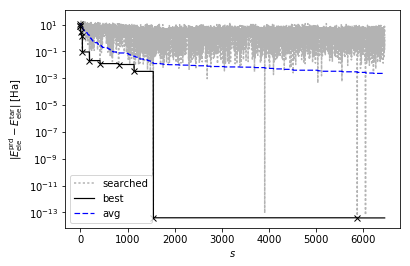

In [20]:
fig, ax = plt.subplots(1,1)
hist_plot(ax, opt_log)
pass 
ax.legend()
ax.set_ylabel(r'$|E_{\rm ele}^{\rm prd} - E_{\rm ele}^{\rm tar}|$ [Ha]')
ax.set_xlabel(r'$s$')
ax.set_yscale("log", nonposy='clip')

# visualization of optimized molecules

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display

In [22]:
def mol2svg(mol,
             molSize=(200,200),
             kekulize=False, 
             index=False,
             atom_label=False,
             highlight=[],
             colors={},
             sizes={},
            ):
    
    #drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1], int(.5*molSize[0]), int(molSize[1]*.5))
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    opts = drawer.drawOptions()
    kw_drawing = {}
    
    ##################
    # bare bone plot #
    ##################
    m = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(m)
        except:
            m = Chem.Mol(mol.ToBinary())
    if not m.GetNumConformers():
        rdDepictor.Compute2DCoords(m)
    
    ############
    # indexing #
    ############
    if index:
        for i in range(m.GetNumAtoms()):
            opts.atomLabels[i] = m.GetAtomWithIdx(i).GetSymbol()+str(i)
            
    ##############
    # atom label #
    ##############
    if atom_label:
        for i in range(m.GetNumAtoms()):
            opts.atomLabels[i] = m.GetAtomWithIdx(i).GetSymbol()
        
    #################
    # high lighting #
    #################
    kw_hl = {
        'highlightAtoms': highlight,
        'highlightAtomColors': colors,
        'highlightAtomRadii': sizes,
        'highlightBonds': None,
    }
    kw_drawing.update(kw_hl)
    
    drawer.DrawMolecule(m, **kw_drawing)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [23]:
def rdmol2svglist(m, data):
    svg_list = []
    for i in range(len(data['w'])):
        v = data['v'][:,i]
        w = data['w'][i]
        color = {}
        sizes = {}
        highlight = []
        for j in range(len(data['w'])):
            highlight.append(j)
            sizes[j] = v[j]
            if v[j] != 0:
                if v[j] > 0:
                    color[j] = tuple(192./255 for _ in range(3))
                elif v[j] < 0:
                    color[j] = tuple(.2 for _ in range(3))
        kw_bz1 = {
            'molSize': (400,400),
            'index': False,
            # highlights
            'highlight': highlight,
            'colors': color,
            'sizes': sizes
        }
        svg_list.append(mol2svg(m, **kw_bz1))
    return svg_list

In [24]:
def svg2file(svgs, name):
    for i, s in enumerate(svgs):
        with open('%s_ev_%02d.svg' % (name, i), 'w') as f:
            f.write(s)

In [25]:
opt_mol_list = []
for entry in opt_log.list(order='ascent')[:10]:
    print entry
    mol = ccs.generate(**ast.literal_eval(entry.content))
    opt_mol_list.append(mol)

20180117-15:05:45 {'mutation': [[6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]} 0.000000 ('test_run_01171505457_448',)
20180117-14:56:18 {'mutation': [[6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]} 0.000000 ('test_run_01171456183_448',)
20180117-15:06:23 {'mutation': [[5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]} 0.000000 ('test_run_01171506231_448',)
20180117-15:00:28 {'mutation': [[6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]} 0.000000 ('test_run_01171500284_448',)
20180117-15:03:19 {'mutation': [[6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6]]} 0.000433 ('test_run_01171503200_448',)
20180117-15:04:47 {'mutation': [[6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6]]} 0.000571 ('test_run_01171504475_448',)
20180117-14:58:05 {'mutation': [[5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6]]} 0.000928 ('test_r

In [26]:
rdm_list = []
for mol in opt_mol_list:
    mol.write('tmp.xyz')
    os.system("obabel -ixyz -opdb tmp.xyz > tmp.pdb")
    rdm_list.append(Chem.MolFromPDBFile('tmp.pdb'))

In [27]:
def getMol(dZ):
    mol = qtk.Molecule()
    R = mol_base.R
    Z = np.array(mol_base.Z)
    Z[:len(dZ)] = Z[:len(dZ)] + np.array(dZ)
    ZR = np.hstack([Z[:,np.newaxis], R])
    mol.build(ZR)
    return mol

In [28]:
mol_target = getMol(test_dz[0])
mol_target.write('tmp.xyz')
os.system("obabel -ixyz -opdb tmp.xyz > tmp.pdb")
rdm_target = Chem.MolFromPDBFile('tmp.pdb')

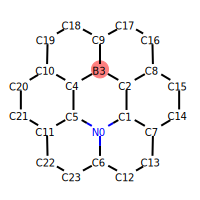

In [29]:
mol = mol_target
B_list = np.arange(mol.N)[mol.Z == 5].tolist()
display(SVG(mol2svg(rdm_target, index=True, highlight=B_list)))
with open('target_mol.svg', 'w') as f:
    f.write(mol2svg(rdm_target, index=True, highlight=B_list))

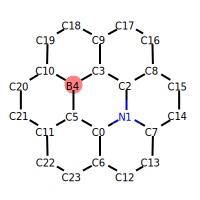

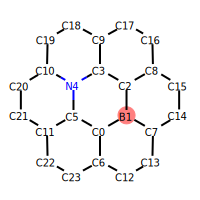

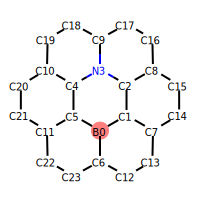

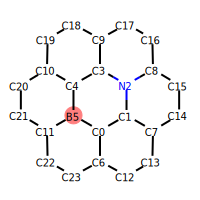

In [34]:
for i, mol in enumerate(opt_mol_list[:4]):
    mol = opt_mol_list[i]
    B_list = np.arange(mol.N)[mol.Z == 5].tolist()
    svg = mol2svg(rdm_list[i], index=True, highlight=B_list)
    display(SVG(svg))
    with open('opt_mol_%02d.svg' % i, 'w') as f:
        f.write(svg)

# fixed BN pair search

In [36]:
ls

coronene.xyz           GAOptimize_coronene/     optimization.db  target_mol.svg
coronene.yml           GAOptimize_coronene.zip  opt_mol_00.svg   test.xyz
data_coronene_1st.npz  GAOptimize.ipynb         opt_mol_01.svg   tmp.pdb
data_coronene.npz      new.db                   opt_mol_02.svg   tmp.xyz
ga_coronene.log        optimization_back.db     opt_mol_03.svg
